This notebook introduces basic ideas in pre-processing text using minutes from the Bank of England's Monetary Policy Committee meetings as an example, as well as information retrieval via dictionary methods.  For a more extensive discussion of pre-processing, see the notebook in the "text-mining-tutorial" repository.

Apart from the standard numpy and pandas packages, the tutorial also relies on the topicmodels package, which can be installed using ```pip install topic-modelling-tools```, see https://github.com/sekhansen/text-mining-tutorial for more details.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import topicmodels
import matplotlib.pyplot as plt
from IPython.display import Image

We begin by loading the minutes data.

In [2]:
data = pd.read_csv("mpc_minutes.txt", encoding="utf-8", sep="\t")

In [3]:
data.shape

(7277, 2)

In [4]:
data.columns

Index(['year', 'minutes'], dtype='object')

The data contains 7,277 paragraphs along with a meeting identifier.

In [5]:
data.year.values[0] # first year in sample

199706

In [6]:
data.year.values[-1] # last year in sample

201410

In [7]:
data.minutes.values[1] # second paragraph in sample

'  The 12-month growth rate of notes and coins had fallen back since January, when it was 7.1%. It had fallen to 6.3% in April and the provisional estimate for May was 6.1%. It was not yet clear whether the fall simply reflected a deceleration in demand for cash following the recent fall in retail price inflation, or whether it had implications for future spending.'

For the purposes of this notebook, we aggregate the data to the full meeting rather than paragraph level.

In [8]:
data_agg = data.groupby('year').agg(lambda x: ' '.join(x))
data_agg.shape[0] # total number of meetings in data

209

# Example of Pre-Processing


The first step in pre-processing is to tokenize the data.  Tokenization breaks a raw character string into individual 'tokens' based on some pre-defined rule.

In [9]:
docsobj = topicmodels.RawDocs(data_agg.minutes, "long") # creates object for pre-processing
docsobj.tokens[1][1:30] # first thirty tokens of second meeting

['section',
 'i',
 'of',
 'this',
 'minute',
 'summarises',
 'the',
 'analysis',
 'presented',
 'to',
 'the',
 'mpc',
 'by',
 'bank',
 'staff',
 ',',
 'and',
 'also',
 'incorporates',
 'information',
 'that',
 'became',
 'available',
 'to',
 'the',
 'committee',
 'after',
 'the',
 'presentation']

The second step in pre-processing is to remove all non-alphabetic tokens and all tokens of length one.

In [10]:
docsobj.token_clean(1)
docsobj.tokens[1][1:30] # first thirty tokens of second meeting

['of',
 'this',
 'minute',
 'summarises',
 'the',
 'analysis',
 'presented',
 'to',
 'the',
 'mpc',
 'by',
 'bank',
 'staff',
 'and',
 'also',
 'incorporates',
 'information',
 'that',
 'became',
 'available',
 'to',
 'the',
 'committee',
 'after',
 'the',
 'presentation',
 'section',
 'ii',
 'summarises']

It is instructive to keep track of the dimensionality of the data as we go through different pre-processing steps.

In [11]:
all_stems = [s for d in docsobj.tokens for s in d]
print("number of unique tokens = %d" % len(set(all_stems)))
print("number of total tokens = %d" % len(all_stems))

number of unique tokens = 8967
number of total tokens = 1115996


The next step in pre-processing is to remove stopwords, which here have been defined by the "long" argument to RawDocs above.

In [12]:
docsobj.stopwords # the stopwords removed in this example

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'another',
 'any',
 'are',
 'as',
 'at',
 'back',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'even',
 'ever',
 'every',
 'few',
 'first',
 'five',
 'for',
 'four',
 'from',
 'further',
 'get',
 'go',
 'goes',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'high',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'least',
 'less',
 'like',
 'long',
 'made',
 'make',
 'many',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'never',
 'new',
 'no',
 'nor',
 'not',
 'now',
 'of',
 'off',
 'old',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'put',
 'said',
 'same',
 'say',
 'says',
 'second',
 'see',
 

In [13]:
docsobj.stopword_remove("tokens")

all_stems = [s for d in docsobj.tokens for s in d]
print("number of unique tokens = %d" % len(set(all_stems)))
print("number of total tokens = %d" % len(all_stems))

number of unique tokens = 8818
number of total tokens = 613560


Look at the effect on the number of total tokens from removing a relatively small number of unique tokens!

The final pre-processing step in this example is stemming, which removes suffixes from words in order to map tokens with different grammatical forms into a single linguistic root.

In [14]:
docsobj.stem()

all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

docsobj.stopword_remove("stems") # remove stems that are on the stopword list

number of unique stems = 5550
number of total stems = 613560


Here the total number of terms has stayed the same, but the number of unique terms is much less.

# Example of Dictionary Methods

For this example, we use the monetary policy sentiment dictionaries from Apel and Blix-Grimaldi (2012) to characterize the sentiment of each MPC meeting.  We will then compare the measured sentiment to UK GDP as measured by the Office for National Statistics.

In [15]:
bowobj = topicmodels.BOW(docsobj.stems) # create an object for bag-of-words analysis

In [16]:
topicmodels.bow_data.pos_dict # the positive sentiment words

{'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'expand',
 'expanded',
 'expanding',
 'expands',
 'fast',
 'faster',
 'fastest',
 'gain',
 'gained',
 'gaining',
 'gains',
 'high',
 'higher',
 'highest',
 'increase',
 'increased',
 'increases',
 'increasing',
 'strong',
 'stronger',
 'strongest'}

In [17]:
topicmodels.bow_data.neg_dict # the negative sentiment words

{'contract',
 'contracted',
 'contracting',
 'contracts',
 'decelerate',
 'decelerated',
 'decelerates',
 'decelerating',
 'decrease',
 'decreased',
 'decreases',
 'decreasing',
 'lose',
 'losing',
 'loss',
 'losses',
 'lost',
 'low',
 'lower',
 'lowest',
 'slow',
 'slower',
 'slowest',
 'weak',
 'weaker',
 'weakest'}

The overall sentiment indicator is formed of the net count of positive words divided by the total number of sentiment words (positive + negative).  All sentiment words are stemmed in order to match the data we formed in pre-preprocessing above.

In [18]:
data_agg['pos'] = bowobj.pos_count('stems')
data_agg['neg'] = bowobj.neg_count('stems')
data_agg['sentiment'] = (data_agg.pos - data_agg.neg) /\
                        (data_agg.pos + data_agg.neg)

Next we add quarterly GDP data collected from the ONS website.

In [19]:
ons = pd.read_csv('ons_quarterly_gdp.csv')
data_agg['gdp_growth'] = ons.gdp_growth.values
data_agg['quarter'] = ons.quarter.values

Finally, we compute the average MPC minutes sentiment per quarter, and correlated with GDP.

In [20]:
temp = data_agg.groupby('quarter').agg(np.mean)
print(temp.corr())
temp['quarter'] = sorted(set(ons.label))
temp[['quarter', 'sentiment', 'gdp_growth']].to_csv('output.csv', index=False)

                 pos       neg  sentiment  gdp_growth
pos         1.000000  0.536057   0.572704    0.382814
neg         0.536057  1.000000  -0.289257    0.153855
sentiment   0.572704 -0.289257   1.000000    0.409506
gdp_growth  0.382814  0.153855   0.409506    1.000000


In spite of its arguable lack of subtlety, here dictionary methods have produced a sentiment indicator that indeed correlates with real activity.  Full results are in output.csv.  Below we plot standardized series for growth and sentiment.

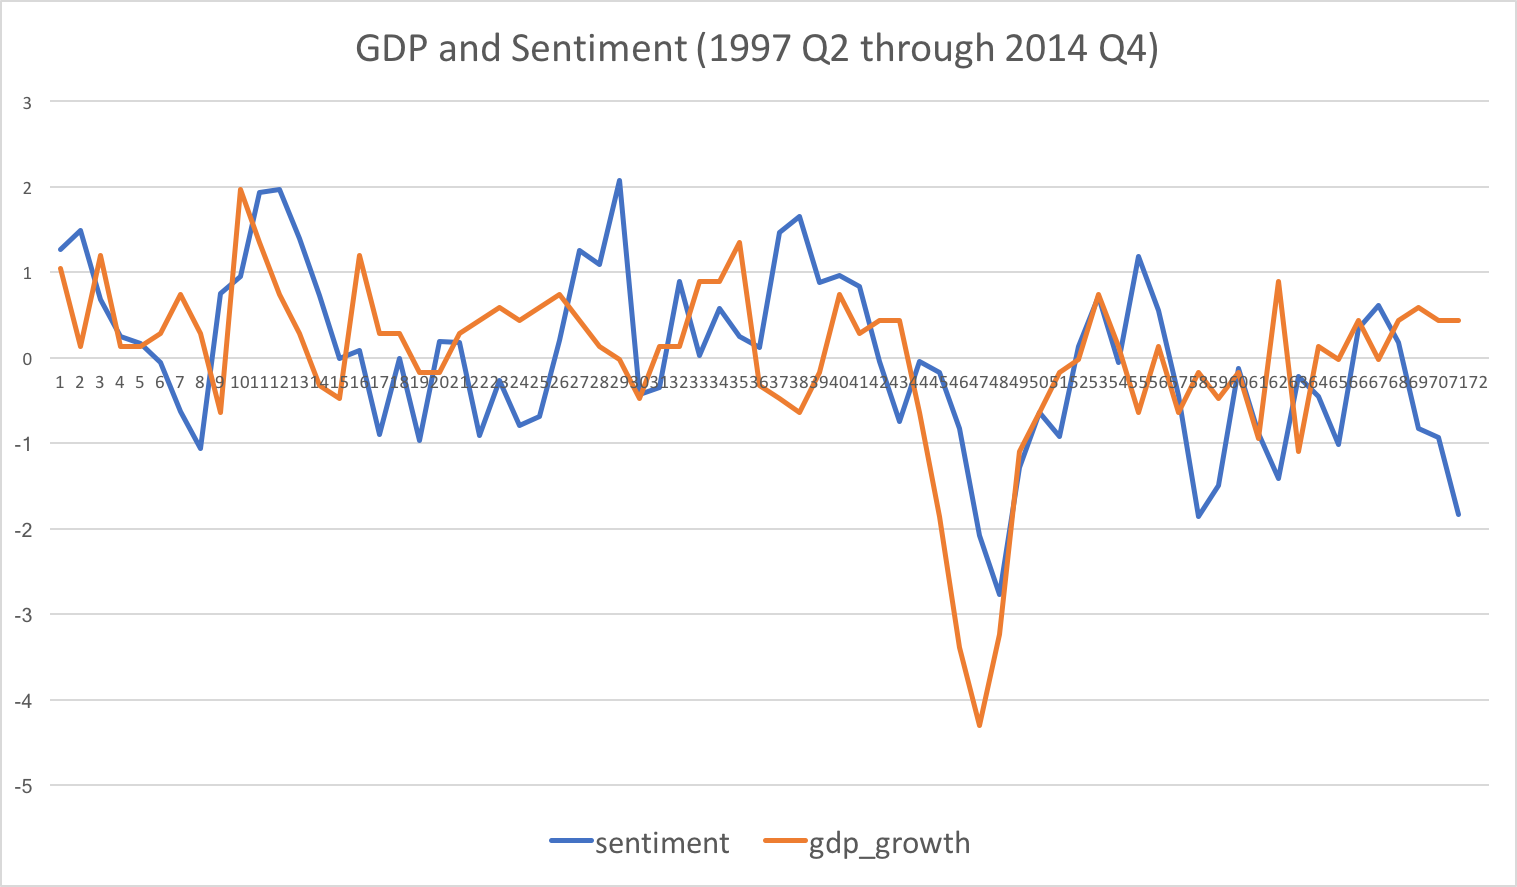

In [21]:
Image(filename="gdp_sentiment.png", width=700, height=700)

# Bigram Feature Space

Above we used stem counts as a feature space, but we could alternatively have used bigram counts.

In [22]:
docsobj.bigram('stems')
docsobj.bigrams[1]

['section.minut',
 'minut.summaris',
 'summaris.analysi',
 'analysi.present',
 'present.mpc',
 'mpc.bank',
 'bank.staff',
 'staff.incorpor',
 'incorpor.inform',
 'inform.becam',
 'becam.avail',
 'avail.committe',
 'committe.present',
 'present.section',
 'section.ii',
 'ii.summaris',
 'summaris.mpcâ',
 'mpcâ.discuss',
 'discuss.polici',
 'polici.implic',
 'implic.analysi',
 'analysi.summari',
 'summari.analysi',
 'analysi.present',
 'present.mpc',
 'mpc.monetari',
 'monetari.condit',
 'condit.estim',
 'estim.chang',
 'chang.note',
 'note.coin',
 'coin.may',
 'may.revis',
 'revis.upward',
 'upward.increas',
 'increas.provision',
 'provision.outturn',
 'outturn.june',
 'june.increas',
 'increas.increas',
 'increas.twelv',
 'twelv.month',
 'month.june',
 'june.provision',
 'provision.estim',
 'estim.appear',
 'appear.littl',
 'littl.chang',
 'chang.twelv',
 'twelv.month',
 'month.increas',
 'increas.februari',
 'februari.evid',
 'evid.continu',
 'continu.deceler',
 'deceler.weaken',
 'wea

In [23]:
all_bigrams = [s for d in docsobj.bigrams for s in d]
print("number of unique bigrams = %d" % len(set(all_bigrams)))
print("number of total bigrams = %d" % len(all_bigrams))

number of unique bigrams = 172016
number of total bigrams = 610013


This richer feature space has increased the number of features immensely, but we can reduce it by removing rare terms which, as we see from the frequency plot below, dominate the feature space (recall Zipf's Law).

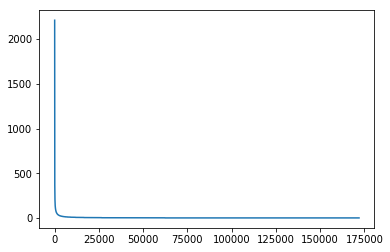

In [24]:
docsobj.stems = docsobj.bigrams #hacky
docsobj.term_rank('stems')
plt.plot([x[1] for x in docsobj.df_ranking])

In [25]:
docsobj.rank_remove("df","stems", 10)
all_bigrams = [s for d in docsobj.stems for s in d]
print("number of unique bigrams = %d" % len(set(all_bigrams)))
print("number of total bigrams = %d" % len(all_bigrams))

number of unique bigrams = 7941
number of total bigrams = 309738


This code drops any bigram that appear in ten or fewer minutes, which substantially reduces the feature space.  We store these features for later use in supervised learning.

In [26]:
df = pd.DataFrame()
bowobj2 = topicmodels.BOW(docsobj.stems)
for v in bowobj2.token_key.keys():
    df[v] = bowobj2.bow[:, bowobj2.token_key[v]]
df.set_index(data_agg.index, inplace=True)
df.to_csv('dt_mat_bigram.csv')